<a href="https://colab.research.google.com/github/Chandu9391/Data-science-codes/blob/main/Auto_Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd

In [145]:
data = pd.read_csv("/content/Microsoft_Stock.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [146]:

data['Date'] = pd.to_datetime(data['Date'],)

In [147]:
data = pd.DataFrame(data)
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [148]:
data.set_index('Date',inplace=True)

In [149]:
data.drop(['Open', 'High', 'Low', 'Close'],axis=1,inplace=True)

In [150]:
data.head()

,Volume
Date,
2015-04-01 16:00:00,36865322
2015-04-02 16:00:00,37487476
2015-04-06 16:00:00,39223692
2015-04-07 16:00:00,28809375
2015-04-08 16:00:00,24753438


In [151]:

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  1511 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


In [152]:
data = data.asfreq('B')
data = data.fillna(method='ffill')

<ipython-input-152-e2bad8e9233a>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [153]:
data.head()

,Volume
Date,
2015-04-01 16:00:00,36865322.0
2015-04-02 16:00:00,37487476.0
2015-04-03 16:00:00,37487476.0
2015-04-06 16:00:00,39223692.0
2015-04-07 16:00:00,28809375.0


In [154]:
import numpy as np

In [155]:
data['Returns'] = data.Volume.pct_change(1).mul(100)

In [156]:
data = data.dropna()

In [157]:
data.head()

,Volume,Returns
Date,,
2015-04-02 16:00:00,37487476.0,1.687640
2015-04-03 16:00:00,37487476.0,0.000000
2015-04-06 16:00:00,39223692.0,4.631456
2015-04-07 16:00:00,28809375.0,-26.551088
2015-04-08 16:00:00,24753438.0,-14.078532


SPLIT INTO TRAIN AND TEST

In [158]:
size = len(data)*0.8

data_train = data[:int(size)]
data_test = data[int(size):]

In [159]:
data_train,data_test

(                         Volume    Returns
 Date                                      
 2015-04-02 16:00:00  37487476.0   1.687640
 2015-04-03 16:00:00  37487476.0   0.000000
 2015-04-06 16:00:00  39223692.0   4.631456
 2015-04-07 16:00:00  28809375.0 -26.551088
 2015-04-08 16:00:00  24753438.0 -14.078532
 ...                         ...        ...
 2020-01-13 16:00:00  21637007.0   4.355471
 2020-01-14 16:00:00  23500783.0   8.613835
 2020-01-15 16:00:00  21417871.0  -8.863160
 2020-01-16 16:00:00  23865360.0  11.427322
 2020-01-17 16:00:00  34371659.0  44.023216
 
 [1252 rows x 2 columns],
                          Volume    Returns
 Date                                      
 2020-01-20 16:00:00  34371659.0   0.000000
 2020-01-21 16:00:00  29517191.0 -14.123461
 2020-01-22 16:00:00  24138777.0 -18.221293
 2020-01-23 16:00:00  19680766.0 -18.468255
 2020-01-24 16:00:00  24918117.0  26.611520
 ...                         ...        ...
 2021-03-25 16:00:00  34061853.0  32.949587
 202

Now check the data is stationary or not
for checking the data is stationary or not we have a method Dickey Fuller test or Augmented test

In [160]:
from scipy.stats.distributions import chi2
from statsmodels.tsa.stattools import adfuller

Ho : not stationary
Ha : stationaty
by adfuller test 2nd value is less than the pvalue(0.05) so we reject null hypothesis.so data is stationary

In [161]:
adfuller(data['Returns'])

(-39.852712240077395,
 0.0,
 0,
 1564,
 {'1%': -3.4345380212339838,
  '5%': -2.8633897592903237,
  '10%': -2.5677547800740443},
 22920.251659117126)

ACF and PACF for Returns

In [162]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt

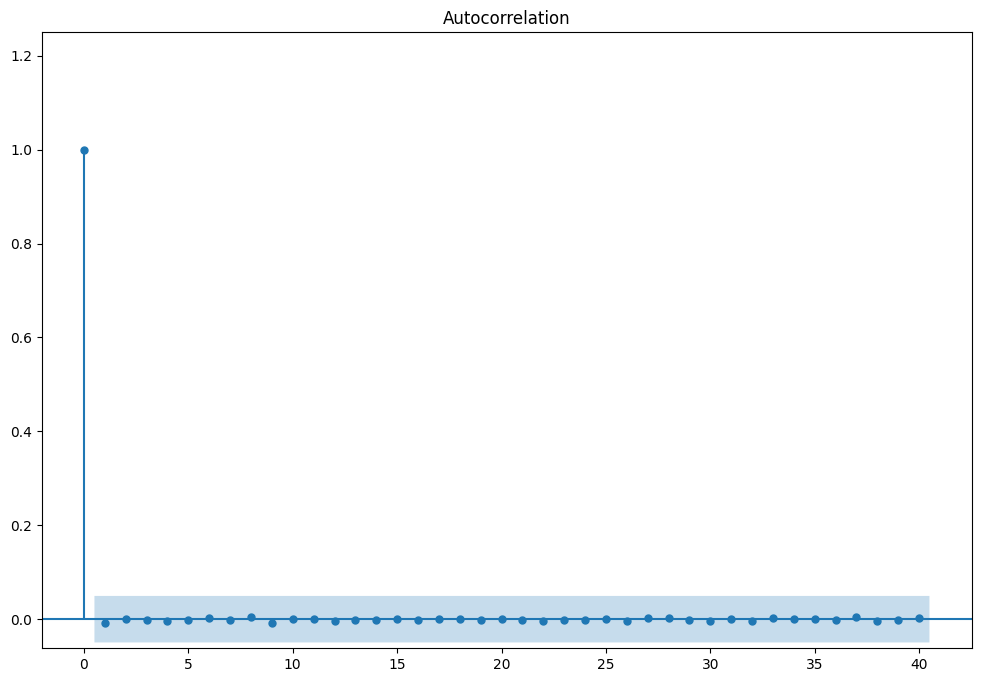

In [163]:
fig,ax = plt.subplots(figsize=(12,8))
sgt.plot_acf(data['Returns'],lags=40,ax=ax,auto_ylims=True)
plt.show()

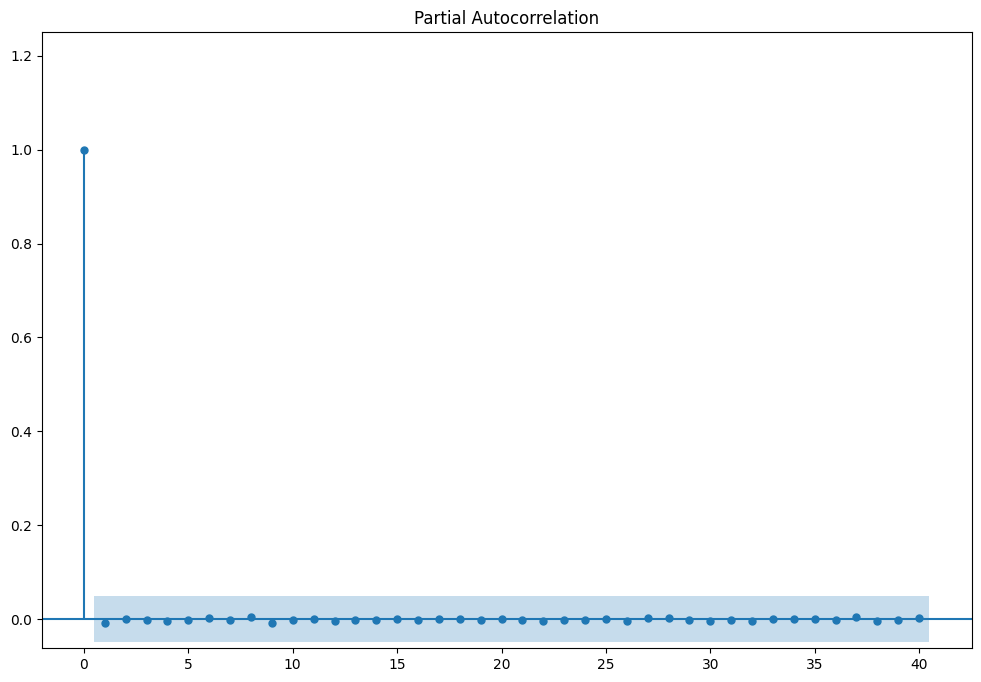

In [164]:
fig,ax = plt.subplots(figsize=(12,8))
sgt.plot_pacf(data['Returns'],lags=40,ax=ax,auto_ylims=True)
plt.show()

In [167]:
from statsmodels.tsa.arima.model import ARIMA

model_ar1 = ARIMA(data_train['Returns'],order=(1,0,0)) # Use the updated ARIMA import
model_ar1 = model_ar1.fit()

In [168]:
model_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Returns   No. Observations:                 1252
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9444.313
Date:                Fri, 23 Aug 2024   AIC                          18894.626
Time:                        06:57:05   BIC                          18910.023
Sample:                    04-02-2015   HQIC                         18900.414
                         - 01-17-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0707    151.418      0.119      0.905    -278.703     314.844
ar.L1         -0.0084      0.099     -0.085      0.933      -0.203       0.186
sigma2      2.089e+05   4020.331     51.965      0.000    2.01e+05    2.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          79014065.48
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):             245.64   Skew:                            34.95
Prob(H) (two-sided):                  0.00   Kurtosis:                      1231.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
model_ar2 = ARIMA(data_train['Returns'],order=(2,0,0))
model_ar2 = model_ar2.fit()

In [171]:
model_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Returns   No. Observations:                 1252
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9444.313
Date:                Fri, 23 Aug 2024   AIC                          18896.626
Time:                        06:57:47   BIC                          18917.156
Sample:                    04-02-2015   HQIC                         18904.344
                         - 01-17-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0707    151.494      0.119      0.905    -278.853     314.994
ar.L1         -0.0084      0.099     -0.085      0.933      -0.203       0.186
ar.L2         -0.0005      0.619     -0.001      0.999      -1.214       1.213
sigma2      2.091e+05   4040.347     51.748      0.000    2.01e+05    2.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          79013571.73
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):             245.65   Skew:                            34.95
Prob(H) (two-sided):                  0.00   Kurtosis:                      1231.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [173]:
def LLR_test(model_1,model_2,df=1):
  L1 = model_1.llf
  L2 = model_2.llf
  LR = (2*(L2-L1))
  P = chi2.sf(LR, df).round(3)
  return P

Ho = no improvement ,
Ha = improvement ,

1 is greater than the p value so we accept the null hypothesis (there is no improvement)
check by building model3

In [174]:
LLR_test(model_ar1,model_ar2)

1.0

###Explanation of LLR

In [176]:
model_ar1.llf

-9444.312802632634

In [177]:
model_ar2.llf

-9444.313238282892

In [179]:
lr = 2*(model_ar2.llf-model_ar1.llf)
lr

-0.0008713005154277198

In [183]:
chi2.sf(lr,1)

1.0

In [184]:
model_ar3 = ARIMA(data_train['Returns'],order=(2,0,0))
model_ar3 = model_ar3.fit()

In [186]:
model_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Returns   No. Observations:                 1252
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9444.313
Date:                Fri, 23 Aug 2024   AIC                          18896.626
Time:                        07:09:08   BIC                          18917.156
Sample:                    04-02-2015   HQIC                         18904.344
                         - 01-17-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0707    151.494      0.119      0.905    -278.853     314.994
ar.L1         -0.0084      0.099     -0.085      0.933      -0.203       0.186
ar.L2         -0.0005      0.619     -0.001      0.999      -1.214       1.213
sigma2      2.091e+05   4040.347     51.748      0.000    2.01e+05    2.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          79013571.73
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):             245.65   Skew:                            34.95
Prob(H) (two-sided):                  0.00   Kurtosis:                      1231.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [187]:
LLR_test(model_ar2,model_ar3)

1.0

Analysis of Residuals

In [188]:
data['resid'] = model_ar1.resid

In [200]:
data = data.dropna()

In [202]:
data['resid']

,resid
Date,


here there is no residuals so here it is stopped
while doing with the other datasets we have residuals then we have find Dickey fuller test and find the resids are stationary ot not and same procedure like AR MODEL only difference is order is changed (0,0,1) this is for MA MODEL